# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|████████████████████████████████████████████████████████| 60.0K/60.0K [00:51<00:00, 1.17KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

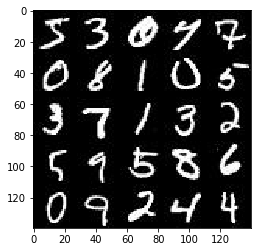

In [1]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import helper
data_dir = './data'


mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

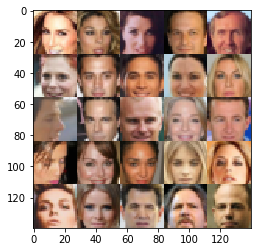

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [4]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None,z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [5]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    keep_prob = 0.8
    with tf.variable_scope('discriminator',reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2,padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.nn.dropout(relu1,keep_prob=keep_prob)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2,padding='same')
        batch_norm = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * batch_norm, batch_norm)
        relu2 = tf.nn.dropout(relu2,keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2,padding='same')
        batch_norm2 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * batch_norm2, batch_norm2)
        relu3 = tf.nn.dropout(relu3,keep_prob=keep_prob)
        
        x4 = tf.layers.conv2d(relu3, 512, 5, strides=2,padding='same')
        batch_norm3= tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * batch_norm3, batch_norm3)
        relu4 = tf.nn.dropout(relu4,keep_prob=keep_prob)
        
               
        #flat = tf.reshape(relu3, (-1, 4*4*256))
        flat = tf.contrib.layers.flatten(relu4)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [6]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    if is_train:
        reuse = False
    else:
        reuse = True
    keep_prob = 0.8
    with tf.variable_scope('generator',reuse=reuse):
        alpha = 0.2
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = tf.maximum(alpha * bn1, bn1)
        relu1 = tf.nn.dropout(relu1,keep_prob=keep_prob)
        #4X4x512
        
        x2 = tf.layers.conv2d_transpose(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(alpha * bn2,bn2)
        relu2 = tf.nn.dropout(relu2,keep_prob=keep_prob)
        #8X8x256
        
        x3 = tf.layers.conv2d_transpose(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(alpha * bn3,bn3)
        relu3 = tf.nn.dropout(relu3,keep_prob=keep_prob)
        #16X16x128
        
        x4 = tf.layers.conv2d_transpose(relu3, 64, 5, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=is_train)
        relu4 = tf.maximum(alpha * bn4,bn4)
        relu4 = tf.nn.dropout(relu4,keep_prob=keep_prob)
        #16X16x64

        # Output layer
        x4 = tf.layers.conv2d_transpose(relu4, out_channel_dim, 13, strides=1, padding='valid')
        # 28x28xout_channel_dim now
        #logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=1, padding='valid')
        #logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='valid')
        
        out = tf.tanh(x4)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [7]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.2
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [8]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [10]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print("data_shape : ",data_shape)
    # TODO: Build Model
    print_every = 10
    show_every=100
    out_channel_dim = data_shape[3]
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    samples, losses = [], []
    steps = 0
    input_real, input_z, lr = model_inputs(data_shape[2], data_shape[1], data_shape[3], z_dim)
    print("out_channel_dim shape: ",out_channel_dim)
    print("input_real shape: ",input_real.shape)
    
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2
                # TODO: Train Model                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                if steps % show_every == 0:
                    show_generator_output(sess,25,input_z, out_channel_dim, data_image_mode)
                    #sess.run(show_generator_output(sess,3,input_z, out_channel_dim, data_image_mode),
                                  # feed_dict={input_z: sample_z})
        saver.save(sess, './checkpoints/generator.ckpt')
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

data_shape :  (60000, 28, 28, 1)
out_channel_dim shape:  1
input_real shape:  (?, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 1.8257... Generator Loss: 1.7997
Epoch 1/2... Discriminator Loss: 0.3592... Generator Loss: 2.3620
Epoch 1/2... Discriminator Loss: 2.5710... Generator Loss: 0.3597
Epoch 1/2... Discriminator Loss: 2.8064... Generator Loss: 0.3524
Epoch 1/2... Discriminator Loss: 1.2475... Generator Loss: 0.8404
Epoch 1/2... Discriminator Loss: 1.9280... Generator Loss: 0.6155
Epoch 1/2... Discriminator Loss: 1.8065... Generator Loss: 1.3193
Epoch 1/2... Discriminator Loss: 1.7304... Generator Loss: 0.3744
Epoch 1/2... Discriminator Loss: 1.6161... Generator Loss: 1.1993
Epoch 1/2... Discriminator Loss: 1.0444... Generator Loss: 1.0506


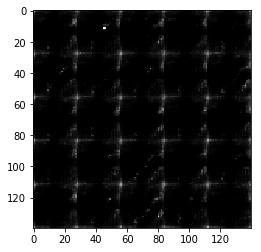

Epoch 1/2... Discriminator Loss: 0.9313... Generator Loss: 1.1112
Epoch 1/2... Discriminator Loss: 1.4082... Generator Loss: 1.0126
Epoch 1/2... Discriminator Loss: 1.2248... Generator Loss: 1.3354
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.9991
Epoch 1/2... Discriminator Loss: 0.9045... Generator Loss: 1.2956
Epoch 1/2... Discriminator Loss: 1.2992... Generator Loss: 0.7791
Epoch 1/2... Discriminator Loss: 0.8653... Generator Loss: 1.0948
Epoch 1/2... Discriminator Loss: 1.5882... Generator Loss: 0.5861
Epoch 1/2... Discriminator Loss: 1.2230... Generator Loss: 0.8551
Epoch 1/2... Discriminator Loss: 1.3695... Generator Loss: 0.7170


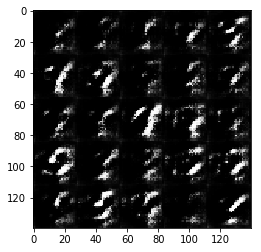

Epoch 1/2... Discriminator Loss: 1.2794... Generator Loss: 0.6972
Epoch 1/2... Discriminator Loss: 1.8116... Generator Loss: 0.6612
Epoch 1/2... Discriminator Loss: 1.2946... Generator Loss: 0.8895
Epoch 1/2... Discriminator Loss: 1.3063... Generator Loss: 0.7577
Epoch 1/2... Discriminator Loss: 1.4454... Generator Loss: 0.6159
Epoch 1/2... Discriminator Loss: 1.2432... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 1.3823... Generator Loss: 0.8446
Epoch 1/2... Discriminator Loss: 1.2919... Generator Loss: 0.8104
Epoch 1/2... Discriminator Loss: 1.0937... Generator Loss: 0.9310
Epoch 1/2... Discriminator Loss: 1.1941... Generator Loss: 0.6366


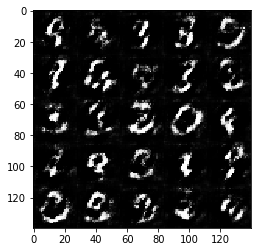

Epoch 1/2... Discriminator Loss: 1.3781... Generator Loss: 0.8521
Epoch 1/2... Discriminator Loss: 1.2021... Generator Loss: 0.7717
Epoch 1/2... Discriminator Loss: 1.3932... Generator Loss: 0.8245
Epoch 1/2... Discriminator Loss: 1.3631... Generator Loss: 0.7309
Epoch 1/2... Discriminator Loss: 1.2253... Generator Loss: 0.8531
Epoch 1/2... Discriminator Loss: 1.3236... Generator Loss: 0.7096
Epoch 1/2... Discriminator Loss: 1.2935... Generator Loss: 0.5337
Epoch 1/2... Discriminator Loss: 1.1000... Generator Loss: 1.1967
Epoch 1/2... Discriminator Loss: 1.1634... Generator Loss: 0.8555
Epoch 1/2... Discriminator Loss: 1.6209... Generator Loss: 0.5116


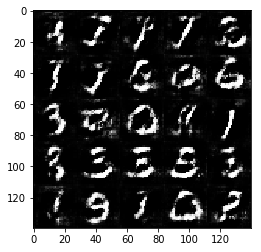

Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.9957
Epoch 1/2... Discriminator Loss: 1.3430... Generator Loss: 1.0740
Epoch 1/2... Discriminator Loss: 1.5297... Generator Loss: 0.4986
Epoch 1/2... Discriminator Loss: 1.3756... Generator Loss: 0.6262
Epoch 1/2... Discriminator Loss: 0.9867... Generator Loss: 1.1007
Epoch 1/2... Discriminator Loss: 1.3276... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 1.1686... Generator Loss: 0.9761
Epoch 1/2... Discriminator Loss: 1.2904... Generator Loss: 0.7423
Epoch 1/2... Discriminator Loss: 1.1280... Generator Loss: 1.0154
Epoch 1/2... Discriminator Loss: 1.3340... Generator Loss: 0.6780


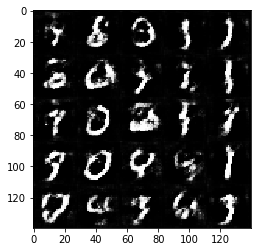

Epoch 1/2... Discriminator Loss: 1.5411... Generator Loss: 0.6151
Epoch 1/2... Discriminator Loss: 1.4184... Generator Loss: 0.4762
Epoch 1/2... Discriminator Loss: 1.3241... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 1.5000... Generator Loss: 0.5152
Epoch 1/2... Discriminator Loss: 1.3856... Generator Loss: 0.8649
Epoch 1/2... Discriminator Loss: 1.1763... Generator Loss: 1.0450
Epoch 1/2... Discriminator Loss: 1.3978... Generator Loss: 0.5835
Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 0.5819
Epoch 1/2... Discriminator Loss: 1.4125... Generator Loss: 0.4987
Epoch 1/2... Discriminator Loss: 1.2748... Generator Loss: 0.7829


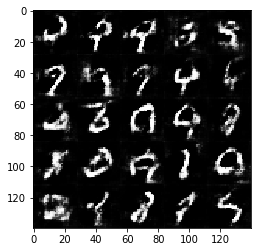

Epoch 1/2... Discriminator Loss: 1.6510... Generator Loss: 0.3653
Epoch 1/2... Discriminator Loss: 1.0626... Generator Loss: 0.7629
Epoch 1/2... Discriminator Loss: 1.3803... Generator Loss: 0.7182
Epoch 1/2... Discriminator Loss: 1.2944... Generator Loss: 0.7061
Epoch 1/2... Discriminator Loss: 1.1798... Generator Loss: 1.1729
Epoch 1/2... Discriminator Loss: 1.3053... Generator Loss: 1.2260
Epoch 1/2... Discriminator Loss: 1.1632... Generator Loss: 0.6492
Epoch 1/2... Discriminator Loss: 1.6748... Generator Loss: 0.3859
Epoch 1/2... Discriminator Loss: 1.0887... Generator Loss: 1.3155
Epoch 1/2... Discriminator Loss: 1.2880... Generator Loss: 0.8932


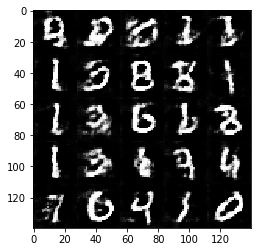

Epoch 1/2... Discriminator Loss: 1.2790... Generator Loss: 0.8676
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 0.7715
Epoch 1/2... Discriminator Loss: 1.5571... Generator Loss: 1.6282
Epoch 1/2... Discriminator Loss: 1.0557... Generator Loss: 0.7837
Epoch 1/2... Discriminator Loss: 1.2307... Generator Loss: 0.5538
Epoch 1/2... Discriminator Loss: 0.9831... Generator Loss: 1.2790
Epoch 1/2... Discriminator Loss: 1.1299... Generator Loss: 0.7170
Epoch 1/2... Discriminator Loss: 1.2600... Generator Loss: 0.8921
Epoch 1/2... Discriminator Loss: 1.1648... Generator Loss: 0.7097
Epoch 1/2... Discriminator Loss: 1.3349... Generator Loss: 0.5962


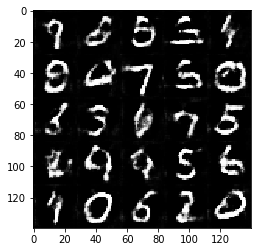

Epoch 1/2... Discriminator Loss: 1.0571... Generator Loss: 1.4758
Epoch 1/2... Discriminator Loss: 1.5957... Generator Loss: 0.4340
Epoch 1/2... Discriminator Loss: 1.1475... Generator Loss: 1.5055
Epoch 1/2... Discriminator Loss: 1.0122... Generator Loss: 1.1734
Epoch 1/2... Discriminator Loss: 1.1112... Generator Loss: 1.4453
Epoch 1/2... Discriminator Loss: 0.9945... Generator Loss: 1.2378
Epoch 1/2... Discriminator Loss: 1.2495... Generator Loss: 0.5408
Epoch 1/2... Discriminator Loss: 1.0591... Generator Loss: 0.8264
Epoch 1/2... Discriminator Loss: 1.3140... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 0.9533... Generator Loss: 1.0387


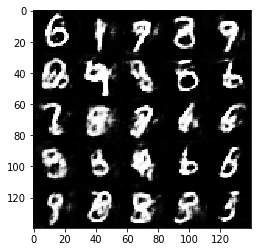

Epoch 1/2... Discriminator Loss: 1.1716... Generator Loss: 0.7221
Epoch 1/2... Discriminator Loss: 0.9581... Generator Loss: 0.7716
Epoch 1/2... Discriminator Loss: 1.4341... Generator Loss: 0.5583
Epoch 2/2... Discriminator Loss: 0.8538... Generator Loss: 0.9210
Epoch 2/2... Discriminator Loss: 1.1955... Generator Loss: 1.1790
Epoch 2/2... Discriminator Loss: 1.2920... Generator Loss: 0.9284
Epoch 2/2... Discriminator Loss: 1.2030... Generator Loss: 0.6612
Epoch 2/2... Discriminator Loss: 1.1086... Generator Loss: 0.8876
Epoch 2/2... Discriminator Loss: 1.3418... Generator Loss: 0.4883
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.6112


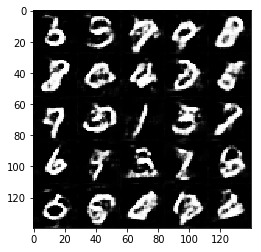

Epoch 2/2... Discriminator Loss: 0.7492... Generator Loss: 0.9482
Epoch 2/2... Discriminator Loss: 0.7776... Generator Loss: 0.9244
Epoch 2/2... Discriminator Loss: 1.0586... Generator Loss: 0.7139
Epoch 2/2... Discriminator Loss: 1.2609... Generator Loss: 0.6877
Epoch 2/2... Discriminator Loss: 1.3732... Generator Loss: 2.2067
Epoch 2/2... Discriminator Loss: 1.1129... Generator Loss: 1.4101
Epoch 2/2... Discriminator Loss: 1.1292... Generator Loss: 1.3100
Epoch 2/2... Discriminator Loss: 1.2185... Generator Loss: 1.3959
Epoch 2/2... Discriminator Loss: 1.0393... Generator Loss: 1.5599
Epoch 2/2... Discriminator Loss: 1.3748... Generator Loss: 0.4056


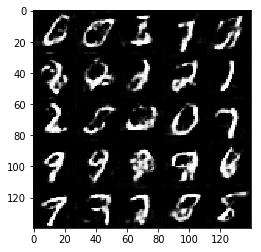

Epoch 2/2... Discriminator Loss: 0.8970... Generator Loss: 1.1061
Epoch 2/2... Discriminator Loss: 0.9944... Generator Loss: 0.7418
Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 1.1602
Epoch 2/2... Discriminator Loss: 1.4122... Generator Loss: 0.4577
Epoch 2/2... Discriminator Loss: 1.1458... Generator Loss: 0.9122
Epoch 2/2... Discriminator Loss: 1.1755... Generator Loss: 0.8549
Epoch 2/2... Discriminator Loss: 1.2693... Generator Loss: 0.6003
Epoch 2/2... Discriminator Loss: 1.3366... Generator Loss: 0.4409
Epoch 2/2... Discriminator Loss: 0.9828... Generator Loss: 0.7160
Epoch 2/2... Discriminator Loss: 0.8656... Generator Loss: 1.0124


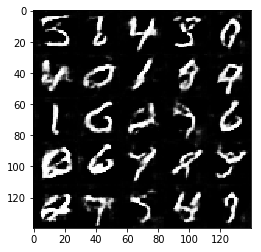

Epoch 2/2... Discriminator Loss: 0.9514... Generator Loss: 0.9545
Epoch 2/2... Discriminator Loss: 1.0870... Generator Loss: 1.6369
Epoch 2/2... Discriminator Loss: 0.9318... Generator Loss: 0.8922
Epoch 2/2... Discriminator Loss: 1.1726... Generator Loss: 0.7261
Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 1.2829
Epoch 2/2... Discriminator Loss: 1.0733... Generator Loss: 0.7625
Epoch 2/2... Discriminator Loss: 0.9980... Generator Loss: 0.8593
Epoch 2/2... Discriminator Loss: 1.0551... Generator Loss: 0.7742
Epoch 2/2... Discriminator Loss: 0.8391... Generator Loss: 0.9486
Epoch 2/2... Discriminator Loss: 1.4701... Generator Loss: 2.6337


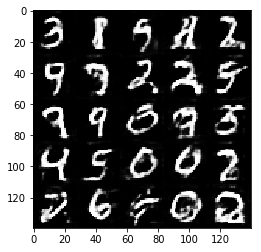

Epoch 2/2... Discriminator Loss: 1.4154... Generator Loss: 0.3766
Epoch 2/2... Discriminator Loss: 1.3473... Generator Loss: 1.4123
Epoch 2/2... Discriminator Loss: 0.7849... Generator Loss: 1.7110
Epoch 2/2... Discriminator Loss: 0.9667... Generator Loss: 0.9583
Epoch 2/2... Discriminator Loss: 1.1646... Generator Loss: 0.6054
Epoch 2/2... Discriminator Loss: 1.0958... Generator Loss: 1.0687
Epoch 2/2... Discriminator Loss: 0.9008... Generator Loss: 0.9444
Epoch 2/2... Discriminator Loss: 0.7938... Generator Loss: 1.1569
Epoch 2/2... Discriminator Loss: 0.7422... Generator Loss: 1.7603
Epoch 2/2... Discriminator Loss: 0.8582... Generator Loss: 0.9679


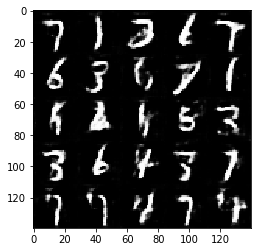

Epoch 2/2... Discriminator Loss: 1.0538... Generator Loss: 0.7675
Epoch 2/2... Discriminator Loss: 1.0798... Generator Loss: 0.5580
Epoch 2/2... Discriminator Loss: 1.2868... Generator Loss: 0.3215
Epoch 2/2... Discriminator Loss: 0.6714... Generator Loss: 1.1020
Epoch 2/2... Discriminator Loss: 0.8854... Generator Loss: 1.1966
Epoch 2/2... Discriminator Loss: 0.8109... Generator Loss: 0.6847
Epoch 2/2... Discriminator Loss: 0.9638... Generator Loss: 0.8429
Epoch 2/2... Discriminator Loss: 1.0797... Generator Loss: 1.2937
Epoch 2/2... Discriminator Loss: 0.9723... Generator Loss: 1.9508
Epoch 2/2... Discriminator Loss: 0.8436... Generator Loss: 1.2038


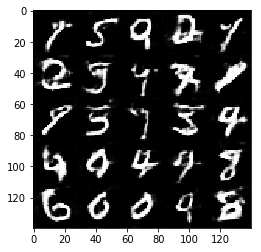

Epoch 2/2... Discriminator Loss: 0.8187... Generator Loss: 0.7938
Epoch 2/2... Discriminator Loss: 0.9356... Generator Loss: 0.6310
Epoch 2/2... Discriminator Loss: 0.9981... Generator Loss: 0.8074
Epoch 2/2... Discriminator Loss: 0.7130... Generator Loss: 2.0782
Epoch 2/2... Discriminator Loss: 0.9696... Generator Loss: 0.8914
Epoch 2/2... Discriminator Loss: 0.7447... Generator Loss: 1.4359
Epoch 2/2... Discriminator Loss: 1.1038... Generator Loss: 0.6942
Epoch 2/2... Discriminator Loss: 1.1402... Generator Loss: 0.6862
Epoch 2/2... Discriminator Loss: 1.4512... Generator Loss: 0.5800
Epoch 2/2... Discriminator Loss: 1.0583... Generator Loss: 0.7795


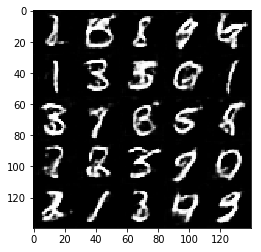

Epoch 2/2... Discriminator Loss: 1.0514... Generator Loss: 0.6150
Epoch 2/2... Discriminator Loss: 0.6660... Generator Loss: 1.1062
Epoch 2/2... Discriminator Loss: 0.9100... Generator Loss: 0.7675
Epoch 2/2... Discriminator Loss: 0.9376... Generator Loss: 1.1126
Epoch 2/2... Discriminator Loss: 1.0281... Generator Loss: 0.4372
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 1.0369
Epoch 2/2... Discriminator Loss: 0.7853... Generator Loss: 1.0172
Epoch 2/2... Discriminator Loss: 0.9615... Generator Loss: 0.9279
Epoch 2/2... Discriminator Loss: 0.8670... Generator Loss: 0.6849
Epoch 2/2... Discriminator Loss: 1.1913... Generator Loss: 0.5607


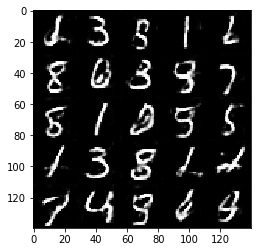

Epoch 2/2... Discriminator Loss: 1.6404... Generator Loss: 0.3661
Epoch 2/2... Discriminator Loss: 0.9219... Generator Loss: 0.7052
Epoch 2/2... Discriminator Loss: 1.3868... Generator Loss: 0.4650
Epoch 2/2... Discriminator Loss: 0.8729... Generator Loss: 1.0614
Epoch 2/2... Discriminator Loss: 0.7800... Generator Loss: 0.9316
Epoch 2/2... Discriminator Loss: 0.6222... Generator Loss: 2.2941
Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 0.8864
Epoch 2/2... Discriminator Loss: 1.0197... Generator Loss: 0.6039
Epoch 2/2... Discriminator Loss: 0.6158... Generator Loss: 1.6691
Epoch 2/2... Discriminator Loss: 1.4980... Generator Loss: 0.5398


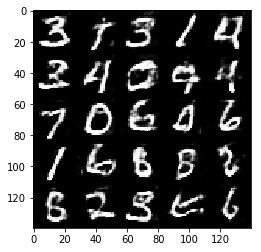

Epoch 2/2... Discriminator Loss: 1.0353... Generator Loss: 0.7356
Epoch 2/2... Discriminator Loss: 0.9091... Generator Loss: 0.4262
Epoch 2/2... Discriminator Loss: 0.7972... Generator Loss: 1.8901
Epoch 2/2... Discriminator Loss: 0.9433... Generator Loss: 1.0153
Epoch 2/2... Discriminator Loss: 1.3105... Generator Loss: 0.7364
Epoch 2/2... Discriminator Loss: 0.8945... Generator Loss: 0.7680
Epoch 2/2... Discriminator Loss: 0.9838... Generator Loss: 0.7001


In [11]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
tf.reset_default_graph()
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

data_shape :  (202599, 28, 28, 3)
out_channel_dim shape:  3
input_real shape:  (?, 28, 28, 3)
Epoch 1/1... Discriminator Loss: 2.8649... Generator Loss: 0.1634
Epoch 1/1... Discriminator Loss: 4.1978... Generator Loss: 0.0415
Epoch 1/1... Discriminator Loss: 0.5905... Generator Loss: 2.2576
Epoch 1/1... Discriminator Loss: 0.9305... Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 1.3282
Epoch 1/1... Discriminator Loss: 0.8765... Generator Loss: 2.4005
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 2.5406
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 0.7163... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 0.9095... Generator Loss: 2.2792


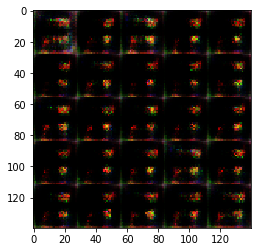

Epoch 1/1... Discriminator Loss: 0.3907... Generator Loss: 3.4709
Epoch 1/1... Discriminator Loss: 0.8277... Generator Loss: 2.4604
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.0726
Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 3.2366
Epoch 1/1... Discriminator Loss: 0.6938... Generator Loss: 1.2542
Epoch 1/1... Discriminator Loss: 0.6034... Generator Loss: 1.5906
Epoch 1/1... Discriminator Loss: 0.5182... Generator Loss: 2.9689
Epoch 1/1... Discriminator Loss: 2.1797... Generator Loss: 4.4598
Epoch 1/1... Discriminator Loss: 0.5560... Generator Loss: 2.4474
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.4386


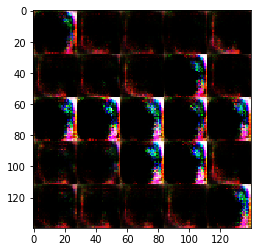

Epoch 1/1... Discriminator Loss: 0.5734... Generator Loss: 1.3921
Epoch 1/1... Discriminator Loss: 1.0870... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 0.6080... Generator Loss: 1.7293
Epoch 1/1... Discriminator Loss: 0.8068... Generator Loss: 3.3558
Epoch 1/1... Discriminator Loss: 0.2836... Generator Loss: 3.0173
Epoch 1/1... Discriminator Loss: 0.7949... Generator Loss: 1.0303
Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 0.5951... Generator Loss: 2.0805
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.4902... Generator Loss: 0.5876


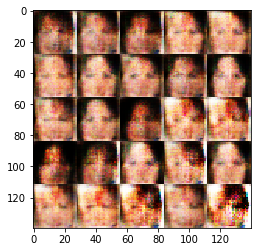

Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.9209
Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 1.1922
Epoch 1/1... Discriminator Loss: 0.8398... Generator Loss: 1.4011
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 1.5495
Epoch 1/1... Discriminator Loss: 1.6284... Generator Loss: 0.4882
Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 2.8211
Epoch 1/1... Discriminator Loss: 0.6565... Generator Loss: 1.4171
Epoch 1/1... Discriminator Loss: 1.4681... Generator Loss: 0.3778
Epoch 1/1... Discriminator Loss: 1.7163... Generator Loss: 0.2624


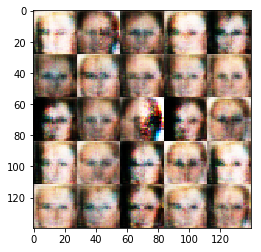

Epoch 1/1... Discriminator Loss: 0.8301... Generator Loss: 1.3914
Epoch 1/1... Discriminator Loss: 1.7814... Generator Loss: 1.4453
Epoch 1/1... Discriminator Loss: 0.8647... Generator Loss: 1.4608
Epoch 1/1... Discriminator Loss: 0.6046... Generator Loss: 2.0267
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.1756... Generator Loss: 1.0577
Epoch 1/1... Discriminator Loss: 0.9044... Generator Loss: 0.8400
Epoch 1/1... Discriminator Loss: 1.6435... Generator Loss: 0.4866
Epoch 1/1... Discriminator Loss: 0.8177... Generator Loss: 1.1119
Epoch 1/1... Discriminator Loss: 1.1742... Generator Loss: 0.7054


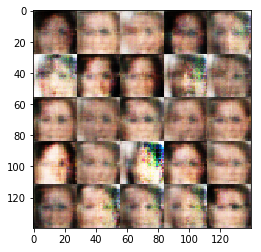

Epoch 1/1... Discriminator Loss: 0.8057... Generator Loss: 1.4682
Epoch 1/1... Discriminator Loss: 1.1259... Generator Loss: 0.8262
Epoch 1/1... Discriminator Loss: 0.8256... Generator Loss: 2.4186
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 0.7370
Epoch 1/1... Discriminator Loss: 1.8535... Generator Loss: 0.3414
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.5211
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.5961
Epoch 1/1... Discriminator Loss: 1.0056... Generator Loss: 0.8480
Epoch 1/1... Discriminator Loss: 1.9334... Generator Loss: 0.3522
Epoch 1/1... Discriminator Loss: 0.9674... Generator Loss: 1.3728


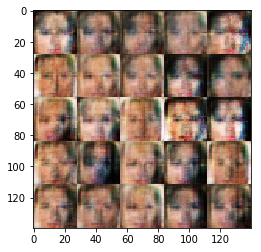

Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.9756
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 1.2849
Epoch 1/1... Discriminator Loss: 1.2265... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.0397... Generator Loss: 1.0025
Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.1917... Generator Loss: 0.8639
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 0.8782


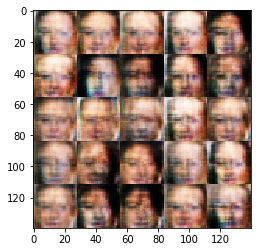

Epoch 1/1... Discriminator Loss: 1.2624... Generator Loss: 1.1850
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 1.6600... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.9864
Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.5955
Epoch 1/1... Discriminator Loss: 1.9260... Generator Loss: 0.2637
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 1.3871
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.1650... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.7622


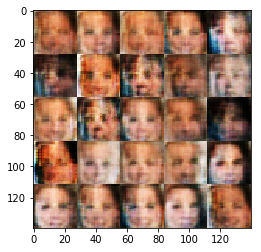

Epoch 1/1... Discriminator Loss: 1.1756... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.4905... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 0.8823
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.7740
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.9662
Epoch 1/1... Discriminator Loss: 1.2060... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.0115... Generator Loss: 1.3032
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.6058


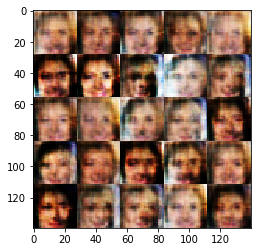

Epoch 1/1... Discriminator Loss: 1.0078... Generator Loss: 1.6747
Epoch 1/1... Discriminator Loss: 1.7620... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.6757
Epoch 1/1... Discriminator Loss: 1.6002... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 1.0344
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.8038
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.5415
Epoch 1/1... Discriminator Loss: 1.4609... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 0.7660
Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 1.0150


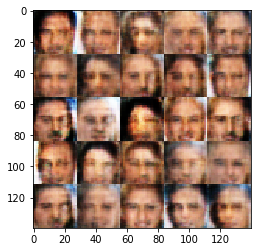

Epoch 1/1... Discriminator Loss: 1.1047... Generator Loss: 0.7511
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.5060
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 0.9180
Epoch 1/1... Discriminator Loss: 1.6078... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 1.3234
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.8267
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.7528
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.8970
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6987


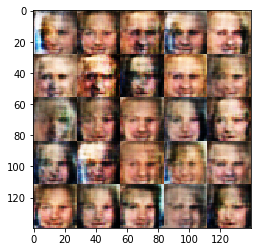

Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 0.5478
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 1.1152... Generator Loss: 0.8027
Epoch 1/1... Discriminator Loss: 1.5057... Generator Loss: 0.5883
Epoch 1/1... Discriminator Loss: 1.5540... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.8768
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.8437


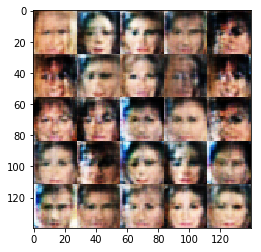

Epoch 1/1... Discriminator Loss: 1.5555... Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.5091... Generator Loss: 0.6487
Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 0.8980
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.6304
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.8119
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.7593


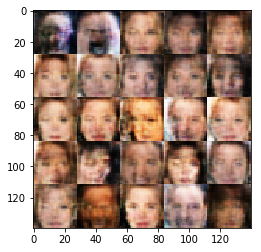

Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 0.5210
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 0.8389
Epoch 1/1... Discriminator Loss: 1.5372... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 1.0544... Generator Loss: 0.8564
Epoch 1/1... Discriminator Loss: 1.1469... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.4372... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.8768
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 1.0735


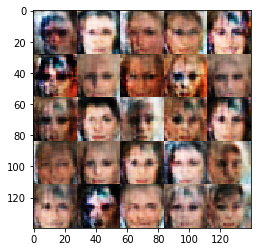

Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 0.5864
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.6027... Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.7441
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 1.1661... Generator Loss: 0.9372
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6393


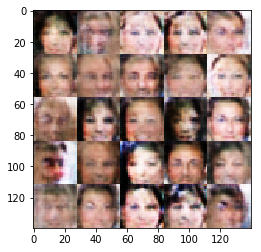

Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.2971... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.9289
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.5999
Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.5222
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.7088


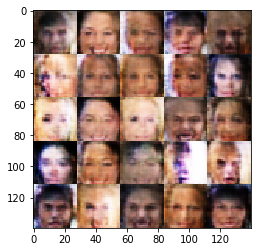

Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 1.0506
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.5856
Epoch 1/1... Discriminator Loss: 1.5353... Generator Loss: 0.7113
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.7199
Epoch 1/1... Discriminator Loss: 1.2057... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.8436


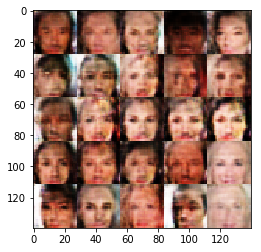

Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 0.7610
Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.0282
Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 0.7719
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.8360
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 0.8746
Epoch 1/1... Discriminator Loss: 1.1332... Generator Loss: 0.9873
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.9917
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.6903


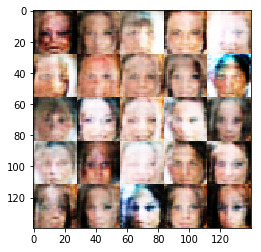

Epoch 1/1... Discriminator Loss: 1.4608... Generator Loss: 0.7847
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.6710
Epoch 1/1... Discriminator Loss: 1.6168... Generator Loss: 0.5521
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8247
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.7070
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 0.9784
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.4944
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.2303... Generator Loss: 0.8512


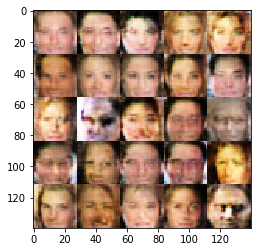

Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.2462... Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.2219... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.7362
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.8211


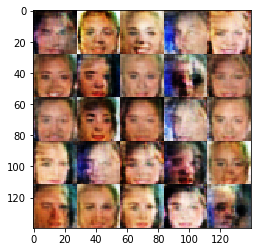

Epoch 1/1... Discriminator Loss: 1.5808... Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 0.9280
Epoch 1/1... Discriminator Loss: 1.1385... Generator Loss: 0.8338
Epoch 1/1... Discriminator Loss: 1.4376... Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.6265... Generator Loss: 0.6790
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.8660... Generator Loss: 0.3671
Epoch 1/1... Discriminator Loss: 1.6010... Generator Loss: 0.5441
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 0.8039


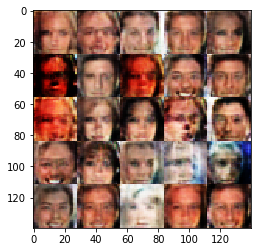

Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.7982
Epoch 1/1... Discriminator Loss: 1.2099... Generator Loss: 0.8916
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.8259
Epoch 1/1... Discriminator Loss: 1.3318... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.5247... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.8303


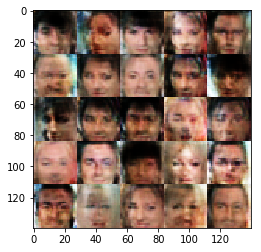

Epoch 1/1... Discriminator Loss: 1.1537... Generator Loss: 0.8123
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.8514
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7539
Epoch 1/1... Discriminator Loss: 1.2804... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.6637
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 1.0474
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 1.5203
Epoch 1/1... Discriminator Loss: 0.8855... Generator Loss: 0.9419


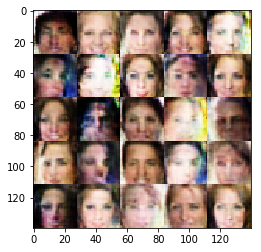

Epoch 1/1... Discriminator Loss: 1.5234... Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 0.7558
Epoch 1/1... Discriminator Loss: 1.5610... Generator Loss: 0.4738
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.8985
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.1630... Generator Loss: 0.7532
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.8386


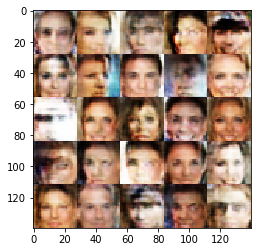

Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 0.9123
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.5701
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 0.8429
Epoch 1/1... Discriminator Loss: 1.1445... Generator Loss: 0.8265
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.5265
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 0.7113
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.8434
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.7377


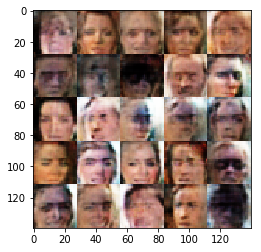

Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.5489
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.1976... Generator Loss: 1.1676
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.3409... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.2647... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.5125
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.5860
Epoch 1/1... Discriminator Loss: 1.2838... Generator Loss: 0.8124


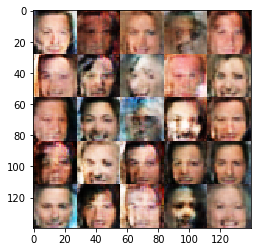

Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.2658... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.9651
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.5029
Epoch 1/1... Discriminator Loss: 1.5356... Generator Loss: 0.5182
Epoch 1/1... Discriminator Loss: 1.2676... Generator Loss: 0.9381
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.4913
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.7519


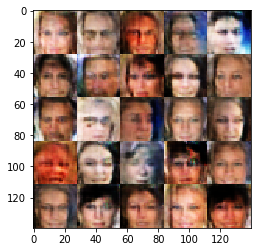

Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.5152... Generator Loss: 0.3967
Epoch 1/1... Discriminator Loss: 1.5724... Generator Loss: 0.4521
Epoch 1/1... Discriminator Loss: 1.1100... Generator Loss: 1.0759
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.2335... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.5846... Generator Loss: 0.4452
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 1.0063


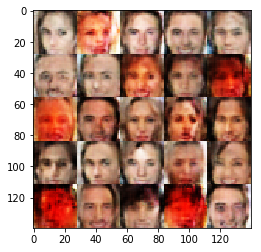

Epoch 1/1... Discriminator Loss: 1.2566... Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 1.3582
Epoch 1/1... Discriminator Loss: 1.0374... Generator Loss: 1.0041
Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.1279... Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.7607


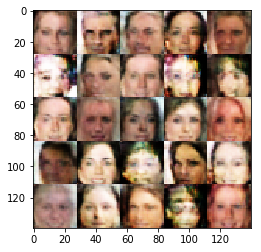

Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 1.1011
Epoch 1/1... Discriminator Loss: 1.1974... Generator Loss: 0.5619
Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.1750... Generator Loss: 0.7121


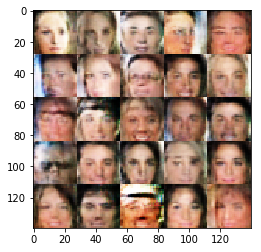

Epoch 1/1... Discriminator Loss: 1.4866... Generator Loss: 0.5379
Epoch 1/1... Discriminator Loss: 1.7136... Generator Loss: 0.4306
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.7981
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.5839
Epoch 1/1... Discriminator Loss: 1.4439... Generator Loss: 0.4880
Epoch 1/1... Discriminator Loss: 1.7313... Generator Loss: 0.3608
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.5783
Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.4833


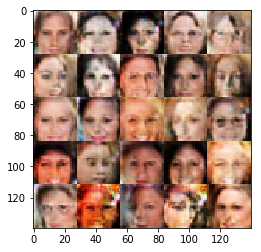

Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.5380
Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 0.8329
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.1086... Generator Loss: 0.6412


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.